In [0]:
from keras.datasets import mnist
import keras.utils.np_utils as ku
import keras.models as models
import keras.layers as layers
from keras import regularizers
from keras.optimizers import rmsprop
import numpy as np
import numpy.random as nr
from tensorflow import set_random_seed
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [63]:
print(train_images[0].shape)

(28, 28)


In [64]:
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [65]:
print(train_labels[0])

5


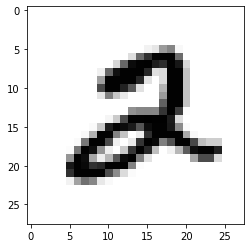

Label = 2


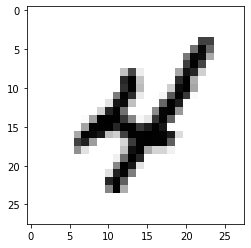

Label = 4


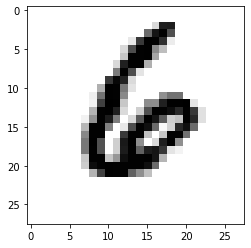

Label = 6


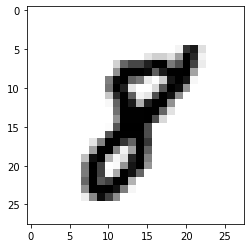

Label = 8


In [66]:
#Train sample images
for i in range(5, 20, 4):
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.show()
    print('Label = ' + str(train_labels[i]))

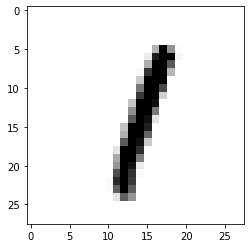

Label = 1


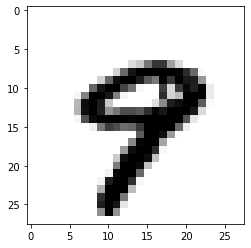

Label = 9


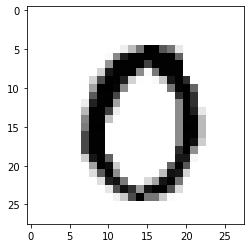

Label = 0


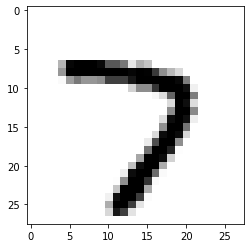

Label = 7


In [67]:
#Test sample images
for i in range(5, 20, 4):
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.show()
    print('Label = ' + str(test_labels[i]))

In [68]:
#Perpare the data for training

print(train_images.shape, train_labels.shape)
train_images = train_images.reshape((60000, 28*28)).astype('float32')/255
print(train_images.shape)
print(train_images.dtype)

(60000, 28, 28) (60000,)
(60000, 784)
float32


In [69]:
print(train_images[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [70]:
print(test_images.shape, test_labels.shape)
test_images = test_images.reshape((10000, 28*28)).astype('float32')/255
print(test_images.shape)

(10000, 28, 28) (10000,)
(10000, 784)


In [71]:
#One-Hot-Encoding for labels
print(train_labels[0])

5


In [72]:
train_labels = ku.to_categorical(train_labels)
print(train_labels[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [73]:
test_labels = ku.to_categorical(test_labels)
print(test_labels[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [0]:
#Defining a sequential model

nn = models.Sequential()
nn.add(layers.Dense(512, activation="relu", input_shape = (28*28, )))
nn.add(layers.Dense(10, activation="softmax"))

In [0]:
nn.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [76]:
#Fit the model
nr.seed(9898)
set_random_seed(9777)
nn.fit(train_images, train_labels, epochs = 5, batch_size = 128)

Epoch 1/5
60000/60000 [==============================] - 6s 102us/step - loss: 0.2603 - acc: 0.9236
Epoch 2/5
60000/60000 [==============================] - 6s 97us/step - loss: 0.1077 - acc: 0.9679
Epoch 3/5
60000/60000 [==============================] - 6s 94us/step - loss: 0.0719 - acc: 0.9785
Epoch 4/5
60000/60000 [==============================] - 6s 99us/step - loss: 0.0524 - acc: 0.9841
Epoch 5/5
60000/60000 [==============================] - 6s 97us/step - loss: 0.0392 - acc: 0.9880


In [77]:
#Evaluate
nn.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 70us/step


[0.06864990658547612, 0.9805]

In [78]:
#Training Over Epochs

## Define a sequential model and print a summary
nnt = models.Sequential()
nnt.add(layers.Dense(512, activation = 'relu', input_shape = (28*28, )))
nnt.add(layers.Dense(10, activation = 'softmax'))
nnt.summary()

## Compile the model. 
nnt.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', 
                metrics = ['accuracy'])
 
## Fit the model saving the results to a history file    
nr.seed(4678)
set_random_seed(8866)
history = nnt.fit(train_images, train_labels, 
                  epochs = 12, batch_size = 128,
                  validation_data = (test_images, test_labels))

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_10 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 7s 113us/step - loss: 0.2643 - acc: 0.9229 - val_loss: 0.1355 - val_acc: 0.9579
Epoch 2/12
60000/60000 [==============================] - 6s 103us/step - loss: 0.1071 - acc: 0.9683 - val_loss: 0.1077 - val_acc: 0.9671
Epoch 3/12
60000/60000 [==============================] - 6s 100us/step - loss: 0.0700 - acc: 0.9786 - val_loss: 0.0878 - val_acc: 0.9720
Epoch 4/12
60000/60000 [======================

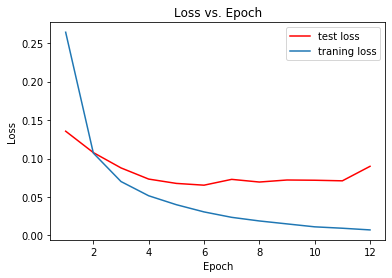

In [81]:
##Loss Plot

def plot_loss(history):
    train_loss = history.history['loss']
    test_loss = history.history['val_loss']
    x = list(range(1, len(test_loss) + 1))
    plt.plot(x, test_loss, color = 'red', label = 'test loss')
    plt.plot(x, train_loss, label = 'traning loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss vs. Epoch')
    plt.legend()
    
plot_loss(history) 

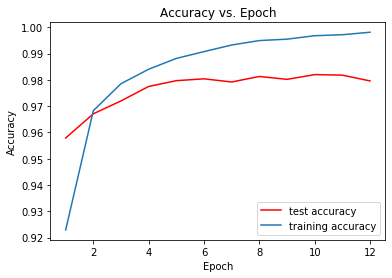

In [82]:
def plot_accuracy(history):
    train_acc = history.history['acc']
    test_acc = history.history['val_acc']
    x = list(range(1, len(test_acc) + 1))
    plt.plot(x, test_acc, color = 'red', label = 'test accuracy')
    plt.plot(x, train_acc, label = 'training accuracy')  
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs. Epoch')  
    plt.legend(loc='lower right')
    
plot_accuracy(history)   

In [83]:
## Adding a second layer

## Define a sequential model
nnt = models.Sequential()
nnt.add(layers.Dense(512, activation = 'relu', input_shape = (28*28, )))
nnt.add(layers.Dense(512, activation = 'relu'))
nnt.add(layers.Dense(10, activation = 'softmax'))
nnt.summary()

## Compile the model
nnt.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', 
                metrics = ['accuracy'])
    
## Fit the model, saving the results to a history file.     
nr.seed(2432)
set_random_seed(5544)
history = nnt.fit(train_images, train_labels, 
                  epochs = 20, batch_size = 128,
                  validation_data = (test_images, test_labels))

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_12 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_13 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 182us/step - loss: 0.2214 - acc: 0.9306 - val_loss: 0.1198 - val_acc: 0.9615
Epoch 2/20
60000/60000 [==============================] - 10s 163us/step - loss: 0.0823 - acc: 0.9745 - val_loss: 0.0847 - val_acc: 0.9731
Epoch 3/20
60000/60000 [==========================

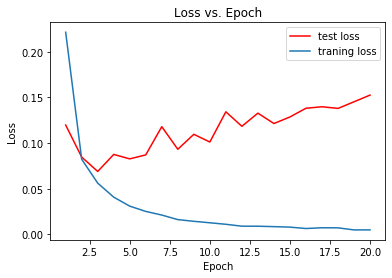

In [84]:
plot_loss(history)

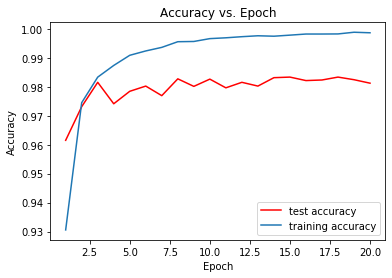

In [85]:
plot_accuracy(history)